In [1]:
from sympy import symbols, init_printing
init_printing()
from celmech.hamiltonian import HamiltonianPoincare, FastHamiltonianPoincare
from celmech.transformations import poincare_vars_from_sim

In [2]:
import rebound
import numpy as np

def make_sim(j, k):
    mass = 1.e-5
    e0 = 0.001 # initial eccentricity of planets
    
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1.)
    sim.add(m=mass, e=e0, P=1.)
    sim.add(m=4*mass, e=1.e-5, P=j/float(j-k))
    sim.add(m=mass, e=e0, P=5.)
    sim.move_to_com()
    return sim

j=5
k=1
sim = make_sim(j,k)

In [3]:
Hsim = HamiltonianPoincare()
Hsim.initialize_from_sim(sim)

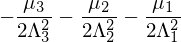

In [4]:
Hsim.H

In [5]:
Hsim.add_all_resonance_subterms(1,2,j,k)

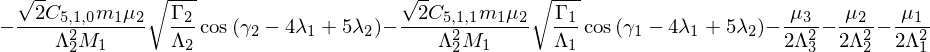

In [6]:
Hsim.H

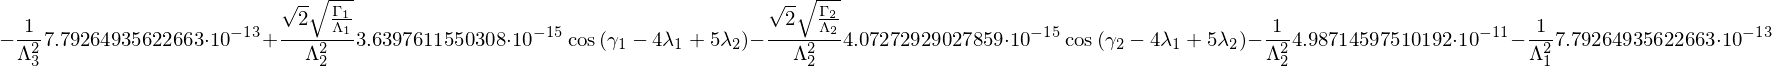

In [7]:
Hsim.NH

In [8]:
sim.particles[1].P

In [2]:
%%time
sim.integrator="whfast"
sim.integrate(1e4)

CPU times: user 10.6 s, sys: 9.39 ms, total: 10.6 s
Wall time: 10.6 s


In [ ]:
sim.particles

In [3]:
%%time
j=5
k=1
sim = make_sim(j,k)

Norbits = 300
Nout = 1000
tmax = Norbits*sim.particles[1].P
times = np.linspace(0, tmax, Nout)

Nsol = np.zeros((4*(sim.N-1), Nout))
symsol = np.zeros((4*(sim.N-1), Nout))
for i, time in enumerate(times):
    sim.integrate(time)
    #Hsim.integrate(time)
    Nsol[:,i] = poincare_vars_from_sim(sim)
    #symsol[:,i] = list(Hsim.integrator.y)

CPU times: user 570 ms, sys: 2.14 ms, total: 572 ms
Wall time: 571 ms


In [5]:
%%time
j=5
k=1
sim = make_sim(j,k)

Norbits = 10000
Nout = 1000
tmax = Norbits*sim.particles[1].P
times = np.linspace(0, tmax, Nout)

Nsol = np.zeros((4*(sim.N-1), Nout))
symsol = np.zeros((4*(sim.N-1), Nout))
for i, time in enumerate(times):
    sim.integrate(time)
    p = FastHamiltonianPoincare(sim)
    Nsol[:,i] = p.integrator.y
    #Hsim.integrate(time)
    #symsol[:,i] = list(Hsim.integrator.y)

CPU times: user 10.9 s, sys: 12.3 ms, total: 10.9 s
Wall time: 10.9 s


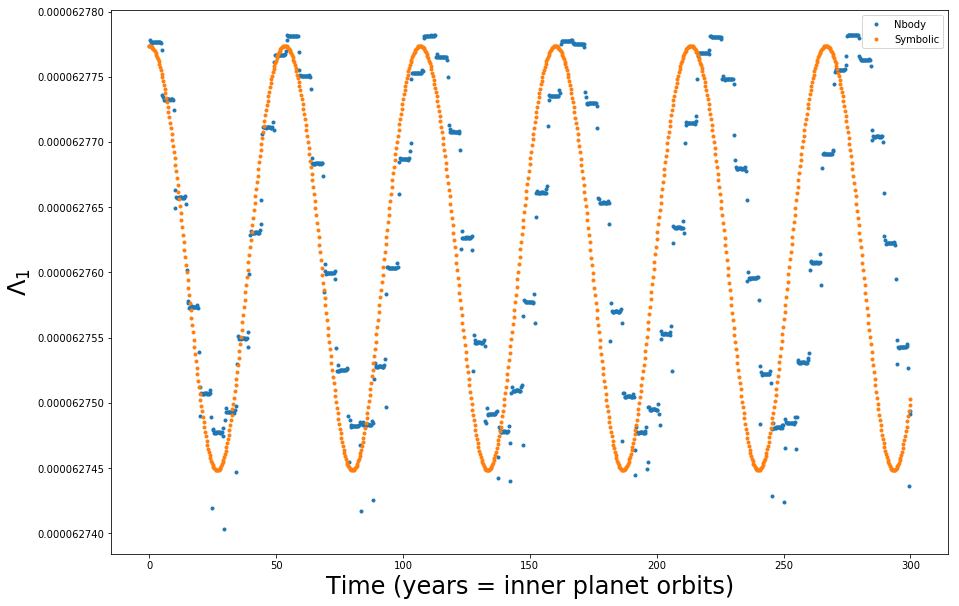

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("Time (years = inner planet orbits)", fontsize=24)
ax.set_ylabel(r"$\Lambda_1$", fontsize=24)

ax.plot(times, Nsol[0,:], '.', label='Nbody')
ax.plot(times, symsol[0,:], '.', label='Symbolic')

ax.legend()